# Bistritzer-MacDonald Continuum Model for tBLG

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches

In [32]:
# Dirac Hamiltonian
def H_D(theta, k):
    """ Build Dirac Hamiltonian for a single graphene layer
    Args:
    - theta (float): twist angle
    - k (tuple): momentum measured from the Dirac point of the layer
    """
    hbar = 6.582E-13  # meV*s
    v = 0.83e16  # Angstroms/s
    k_norm = np.linalg.norm(k)  # 1/Angstroms
    theta_k = 0
    if k_norm > 0:
        theta_k = np.pi / 2 if k[1] > 0 else -np.pi / 2
        if k[0] > 0:
            theta_k = np.arctan(k[1] / k[0])  # prevent divide by 0
        if k[0] < 0:
            theta_k = np.arctan(k[1] / k[0]) + np.pi
    h_k = -hbar * v * k_norm * np.array(
        [[0, np.exp(1j * (theta_k - theta))], [np.exp(-1j * (theta_k - theta)), 0]]
    )
    return h_k

def place_block(matrix, block, row, col):
    """Place block into a matrix with upper left entry of block at (0, 0)
    Args:
    - matrix (numpy array): full matrix to place block into
    - block (numpy array): small matrix to be placed into full matrix
    - row (int): row of matrix that upper left entry of block should be placed at
    - col (int): column of matrix that upper left entry of block should be placed at
    """
    matrix[row:row + block.shape[0], col:col + block.shape[1]] = block

def rotation_matrix(theta):
    """Create 2D rotation matrix"""
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

In [3]:
a = 1.42  # Angstroms

# Direct lattice vectors
a1 = a * np.array([np.sqrt(3), 0])
a2 = a / 2 * np.array([-np.sqrt(3), 3])

# Reciprocal lattice vectors
G_1 = 2 * np.pi / a * np.array([1 / np.sqrt(3), 1 / 3])
G_2 = 2 * np.pi / a * np.array([0, 2 / 3])

phi = 2 * np.pi / 3
w = 110  # meV
w_1 = w
factor = 1
w_0 = factor * w_1
T_b = np.array([[w_0, w_1], [w_1, w_0]])  # Hopping matrix in k space

# Jung paper version
T_tl = np.array([[w_0, w_1 * np.exp(-1j * phi)], [w_1 * np.exp(1j * phi), w_0]])  # Hopping matrix in k space
T_tr = np.array([[w_0, w_1 * np.exp(1j * phi)], [w_1 * np.exp(-1j * phi), w_0]])  # Hopping matrix in k space

# BM Paper version -- equivalent to Jung paper version
# T_tr = w * np.array([[np.exp(-1j * phi), 1], [np.exp(1j * phi), np.exp(-1j * phi)]])
# T_tl = w * np.array([[np.exp(1j * phi), 1], [np.exp(-1j * phi), np.exp(1j * phi)]])

In [11]:
#### Twist angle
theta = 1 * np.pi / 180

# Reciprocal lattice vectors of twisted layer
G_1r = rotation_matrix(theta) @ G_1
G_2r = rotation_matrix(theta) @ G_2

K_1 = (G_1 + G_2) / 3
K_1r = (G_1r + G_2r) / 3
k_theta = np.linalg.norm(K_1r - K_1)  # Moire 1st BZ sidelength

# Hopping vectors in k space
q_b = k_theta * np.array([0, -1])
q_tl = k_theta * np.array([-np.sqrt(3), 1]) / 2
q_tr = k_theta * np.array([np.sqrt(3), 1]) / 2

# Moire reciprocal lattice vectors
M_1 = q_tr - q_tl
M_2 = q_tr - q_b
M_3 = q_tl - q_b
M_4 = q_tl - q_tr
M_5 = q_b - q_tr
M_6 = q_b - q_tl

In [16]:
110 / 6.582E-13 / 1e16

0.01671224551807961

In [17]:
k_theta

0.1485761822939577

In [18]:
1/k_theta**2

45.30035551217781

In [19]:
np.linalg.norm(K_1) * theta

0.14862333744820178

In [20]:
# # Intralayer hopping parameters, neligible
# C_ii = 1.1  # meV
# C_ij = 2.235  # meV
# phi_AA = 82.54 * np.pi / 180
# phi_BB = -phi_AA

# # Intralayer hopping matrices, negligible
# T_M_1 = np.array(
#     [
#         [C_ii * np.exp(1j * phi_AA), C_ij * np.exp(1j * -np.pi)], 
#         [C_ij * np.exp(-1j * -np.pi), C_ii * np.exp(1j * phi_BB)]
#     ]
# )
# T_M_2 = np.array(
#     [
#         [C_ii * np.exp(-1j * phi_AA), C_ij * np.exp(1j * np.pi / 3)], 
#         [C_ij * np.exp(-1j * np.pi / 3), C_ii * np.exp(-1j * phi_BB)]
#     ]
# )
# T_M_3 = np.array(
#     [
#         [C_ii * np.exp(1j * phi_AA), C_ij * np.exp(1j * np.pi / 3)], 
#         [C_ij * np.exp(-1j * np.pi / 3), C_ii * np.exp(1j * phi_BB)]
#     ]
# )
# T_M_4 = np.array(
#     [
#         [C_ii * np.exp(-1j * phi_AA), C_ij * np.exp(1j * -np.pi)], 
#         [C_ij * np.exp(-1j * -np.pi), C_ii * np.exp(-1j * phi_BB)]
#     ]
# )
# T_M_5 = np.array(
#     [
#         [C_ii * np.exp(1j * phi_AA), C_ij * np.exp(1j * -np.pi) / 3], 
#         [C_ij * np.exp(-1j * -np.pi / 3), C_ii * np.exp(1j * phi_BB)]
#     ]
# )
# T_M_6 = np.array(
#     [
#         [C_ii * np.exp(-1j * phi_AA), C_ij * np.exp(1j * -np.pi / 3)], 
#         [C_ij * np.exp(-1j * -np.pi / 3), C_ii * np.exp(-1j * phi_BB)]
#     ]
# )

In [21]:
kpoints_ABC = np.concatenate(
    (np.zeros(200), k_theta * np.linspace(0, 2, 200, endpoint=False))
).reshape(200, 2, order="F")

kpoints_CD = k_theta * np.concatenate(
    (np.linspace(0, np.sqrt(3) / 2, 173), np.linspace(0.5, 2, 173)[::-1])
).reshape(173, 2, order="F")

kpoints_DA = k_theta * np.concatenate(
    (np.linspace(0, np.sqrt(3) / 2, 100, endpoint=False)[::-1], np.linspace(0, 0.5, 100, endpoint=False)[::-1])
).reshape(100, 2, order="F")

# Band structure calculation path
kpoints = np.concatenate((kpoints_ABC, kpoints_CD, kpoints_DA))

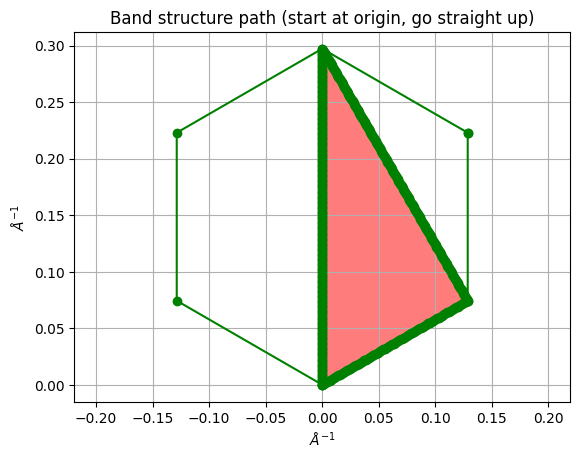

In [22]:
fig, ax = plt.subplots()

path = mpath.Path(kpoints)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.3)
ax.add_patch(patch)

moire_bz_path = mpath.Path(
    np.array(
        [M_1 + M_2, M_2 + M_3, M_3 + M_4, M_4 + M_5, M_5 + M_6, M_6 + M_1, M_1 + M_2]
    ) / 3 + np.array([0, k_theta])
)
moire_bz_patch = mpatches.PathPatch(moire_bz_path, facecolor='r', alpha=0.3)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

x, y = zip(*moire_bz_path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
ax.set_title("Band structure path (start at origin, go straight up)")
ax.set_xlabel(r"$\AA^{-1}$")
ax.set_ylabel(r"$\AA^{-1}$")
plt.show()

In [23]:
bands = []

for k in kpoints:

    ### Create intralayer Dirac Hamiltonians
    h_k = H_D(theta / 2, k)
    h_kb = H_D(-theta / 2, k + q_b)
    h_ktr = H_D(-theta / 2, k + q_tr)
    h_ktl = H_D(-theta / 2, k + q_tl)
    h_kM1 = H_D(theta / 2, k + M_1)
    h_kM2 = H_D(theta / 2, k + M_2)
    h_kM3 = H_D(theta / 2, k + M_3)
    h_kM4 = H_D(theta / 2, k + M_4)
    h_kM5 = H_D(theta / 2, k + M_5)
    h_kM6 = H_D(theta / 2, k + M_6)
    h_kb1 = H_D(-theta / 2, k + M_1 + q_b)
    h_ktr1 = H_D(-theta / 2, k + M_1 + q_tr)
    h_ktr2 = H_D(-theta / 2, k + M_2 + q_tr)
    h_ktl2 = H_D(-theta / 2, k + M_2 + q_tl)
    h_ktl3 = H_D(-theta / 2, k + M_3 + q_tl)
    h_kb4 = H_D(-theta / 2, k + M_4 + q_b)
    h_ktl4 = H_D(-theta / 2, k + M_4 + q_tl)
    h_kb5 = H_D(-theta / 2, k + M_5 + q_b)
    h_kb6 = H_D(-theta / 2, k + M_6 + q_b)

    ### Full Hamiltonian
    H_k = np.zeros((38, 38), dtype=complex)

    ### Place intralayer Dirac Hamiltonians into H_k
    place_block(H_k, h_k, 0, 0)
    place_block(H_k, h_kb, 2, 2)
    place_block(H_k, h_ktr, 4, 4)
    place_block(H_k, h_ktl, 6, 6)
    place_block(H_k, h_kM1, 8, 8)
    place_block(H_k, h_kM2, 10, 10)
    place_block(H_k, h_kM3, 12, 12)
    place_block(H_k, h_kM4, 14, 14)
    place_block(H_k, h_kM5, 16, 16)
    place_block(H_k, h_kM6, 18, 18)
    place_block(H_k, h_kb1, 20, 20)
    place_block(H_k, h_ktr1, 22, 22)
    place_block(H_k, h_ktr2, 24, 24)
    place_block(H_k, h_ktl2, 26, 26)
    place_block(H_k, h_ktl3, 28, 28)
    place_block(H_k, h_kb4, 30, 30)
    place_block(H_k, h_ktl4, 32, 32)
    place_block(H_k, h_kb5, 34, 34)
    place_block(H_k, h_kb6, 36, 36)

    ### Place intralayer hopping Hamiltonians into H_k (negligible, can leave out)
    # place_block(H_k, T_M_1, 0, 8)
    # place_block(H_k, T_M_2, 0, 10)
    # place_block(H_k, T_M_3, 0, 12)
    # place_block(H_k, T_M_4, 0, 14)
    # place_block(H_k, T_M_5, 0, 16)
    # place_block(H_k, T_M_6, 0, 18)
    # place_block(H_k, np.conj(T_M_1.T), 8, 0)
    # place_block(H_k, np.conj(T_M_2.T), 10, 0)
    # place_block(H_k, np.conj(T_M_3.T), 12, 0)
    # place_block(H_k, np.conj(T_M_4.T), 14, 0)
    # place_block(H_k, np.conj(T_M_5.T), 16, 0)
    # place_block(H_k, np.conj(T_M_6.T), 18, 0)

    ### Place interlayer hopping Hamiltonians into H_k
    # 1st shell
    place_block(H_k, T_b, 0, 2)
    place_block(H_k, T_tr, 0, 4)
    place_block(H_k, T_tl, 0, 6)
    place_block(H_k, np.conj(T_b.T), 2, 0)
    place_block(H_k, np.conj(T_tr.T), 4, 0)
    place_block(H_k, np.conj(T_tl.T), 6, 0)

    # 2nd shell
    place_block(H_k, T_b, 8, 20)
    place_block(H_k, T_tr, 8, 22)
    place_block(H_k, np.conj(T_tl.T), 8, 4)
    place_block(H_k, np.conj(T_b.T), 10, 4)
    place_block(H_k, T_tr, 10, 24)
    place_block(H_k, T_tl, 10, 26)
    place_block(H_k, np.conj(T_b.T), 12, 6)
    place_block(H_k, T_tr, 12, 26)
    place_block(H_k, T_tl, 12, 28)
    place_block(H_k, T_b, 14, 30)
    place_block(H_k, np.conj(T_tr.T), 14, 6)
    place_block(H_k, T_tl, 14, 32)
    place_block(H_k, T_b, 16, 34)
    place_block(H_k, np.conj(T_tr.T), 16, 2)
    place_block(H_k, T_tl, 16, 30)
    place_block(H_k, T_b, 18, 36)
    place_block(H_k, T_tr, 18, 20)
    place_block(H_k, np.conj(T_tl.T), 18, 2)
    
    place_block(H_k, np.conj(T_b.T), 20, 8)
    place_block(H_k, np.conj(T_tr.T), 22, 8)
    place_block(H_k, T_tl, 4, 8)
    place_block(H_k, T_b, 4, 10)
    place_block(H_k, np.conj(T_tr.T), 24, 10)
    place_block(H_k, np.conj(T_tl.T), 26, 10)
    place_block(H_k, T_b, 6, 12)
    place_block(H_k, np.conj(T_tr.T), 26, 12)
    place_block(H_k, np.conj(T_tl.T), 28, 12)
    place_block(H_k, np.conj(T_b.T), 30, 14)
    place_block(H_k, T_tr, 6, 14)
    place_block(H_k, np.conj(T_tl.T), 32, 14)
    place_block(H_k, np.conj(T_b.T), 34, 16)
    place_block(H_k, T_tr, 2, 16)
    place_block(H_k, np.conj(T_tl.T), 30, 16)
    place_block(H_k, np.conj(T_b.T), 36, 18)
    place_block(H_k, np.conj(T_tr.T), 20, 18)
    place_block(H_k, T_tl, 2, 18)

    # Diagonalize
    vals, vecs = np.linalg.eig(H_k)
    vals = np.real(vals)
    idxs = np.argsort(vals)
    vals = vals[idxs]
    bands.append(vals)

# bands

(-1500.0, 1500.0)

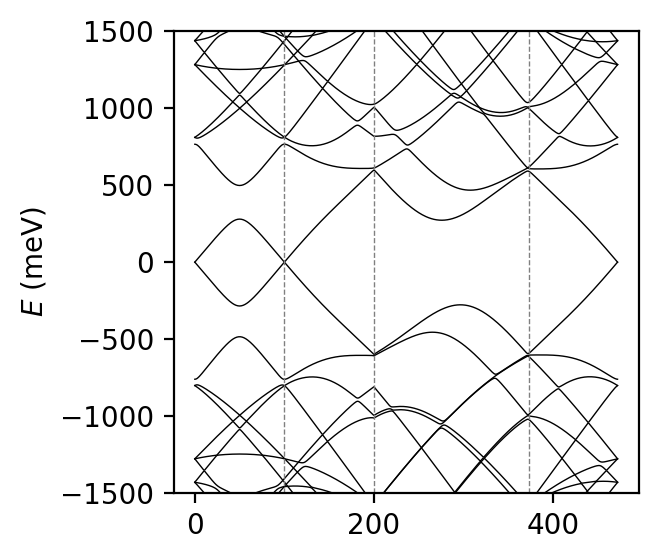

In [25]:
plt.figure(figsize=(3, 3), dpi=200)
bands = np.array(bands)
for i, band in enumerate(bands[0]):
    plt.plot(bands[:, i], color="k", linewidth=0.5)
plt.axvline(100, color="grey", linestyle="--", linewidth=0.5)
plt.axvline(200, color="grey", linestyle="--", linewidth=0.5)
plt.axvline(373, color="grey", linestyle="--", linewidth=0.5)
plt.ylabel(r"$E$ (meV)")
plt.ylim(bottom=-1500, top=1500)

In [6]:
# Twist angle
theta = 5 * np.pi / 180

# Reciprocal lattice vectors of twisted layer
G_1r = rotation_matrix(theta) @ G_1
G_2r = rotation_matrix(theta) @ G_2

K_1 = (G_1 + G_2) / 3
K_1r = (G_1r + G_2r) / 3
k_theta = np.linalg.norm(K_1r - K_1)  # Moire 1st BZ sidelength

# Hopping vectors in k space
q_b = k_theta * np.array([0, -1])
q_tl = k_theta * np.array([-np.sqrt(3), 1]) / 2
q_tr = k_theta * np.array([np.sqrt(3), 1]) / 2

# Moire reciprocal lattice vectors
M_1 = q_tr - q_tl
M_2 = q_tr - q_b
M_3 = q_tl - q_b
M_4 = q_tl - q_tr
M_5 = q_b - q_tr
M_6 = q_b - q_tl

In [7]:
k_theta

0.1485761822939577

In [20]:
kpoints_ABC = k_theta * np.concatenate(
    (np.zeros(100), np.linspace(0, 2, 100, endpoint=False))
).reshape(100, 2, order="F")

kpoints_CD = k_theta * np.concatenate(
    (np.linspace(0, np.sqrt(3) / 2, 87), np.linspace(0.5, 2, 87)[::-1])
).reshape(87, 2, order="F")

kpoints_DA = k_theta * np.concatenate(
    (np.linspace(0, np.sqrt(3) / 2, 50)[::-1], np.linspace(0, 0.5, 50)[::-1])
).reshape(50, 2, order="F")

# Band structure calculation path
kpoints = np.concatenate((kpoints_ABC, kpoints_CD, kpoints_DA))

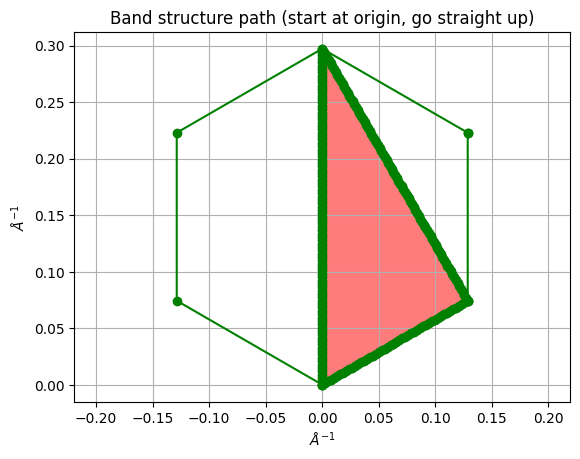

In [21]:
fig, ax = plt.subplots()

path = mpath.Path(kpoints)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.3)
ax.add_patch(patch)

moire_bz_path = mpath.Path(
    np.array(
        [M_1 + M_2, M_2 + M_3, M_3 + M_4, M_4 + M_5, M_5 + M_6, M_6 + M_1, M_1 + M_2]
    ) / 3 + np.array([0, k_theta])
)
moire_bz_patch = mpatches.PathPatch(moire_bz_path, facecolor='r', alpha=0.3)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

x, y = zip(*moire_bz_path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
ax.set_title("Band structure path (start at origin, go straight up)")
ax.set_xlabel(r"$\AA^{-1}$")
ax.set_ylabel(r"$\AA^{-1}$")
plt.show()

In [22]:
def search(m, cutoff, k, prev_id, curr_id, direction):
    """Search for a neighbor
    Args:
    - m (int): a number that basically tells us whether we are in the top
               layer or bottom layer
    - cutoff (float): maximum momentum of any site we use for the band calculation
    - k (np.array): k vector of current momentum site
    - prev_id (int): Index of previous momentum site during the search
    - curr_id (int): Index of current momentum site being searched
    - direction (int): Either -1, 0, or 1, corresponding to which direction we had
                       to travel to get from the previous site to the current site

    Returns:
    - prev_id (int): Index of the current site (which will be the previous site
                     for the next search)
    - curr_id (int): Same value as prev_id except in cases where the site is 
                     outside the cutoff or has already been searched, in which case
                     curr_id is equal to -1
    """
    # Return -1 as the curr_id if we are outside the cutoff radius, indicating that
    # we should stop searching this branch
    if np.linalg.norm(k) > cutoff:
        return prev_id, -1

    # Looks cryptic, but basically if we arrive at a site that has already been
    # searched, then we should just include it as a neighbor of the previous
    # site (and vice versa) and then stop searching this branch
    if len([idx for idx, el in enumerate(list(k_dict.values())) if np.allclose(el, k)]) > 0:
        curr_id = list(k_dict.keys())[[idx for idx, el in enumerate(list(k_dict.values())) if np.allclose(el, k)][0]]
        neighbors_dict[prev_id].add((curr_id, direction))
        neighbors_dict[curr_id].add((prev_id, direction))
        return prev_id, -1

    # If none of the above are true, then we have arrived at a new site that
    # should be included in our band calculations, so we generate a new index
    # for that site
    while curr_id in visited_list:
        curr_id += 1

    # Add the current site as a neighbor of the previous site (and vice versa). 
    # I don't remember why I used a set instead of a list of neighbors--presumably
    # I was having problems with duplicates, so using a set resolved that problem
    if prev_id not in neighbors_dict:
        neighbors_dict[prev_id] = set([(curr_id, direction)])
    else:
        neighbors_dict[prev_id].add((curr_id, direction))
    if curr_id not in neighbors_dict:
        neighbors_dict[curr_id] = set([(prev_id, direction)])
    else:
        neighbors_dict[curr_id].add((prev_id, direction))

    # Mark the site as visited and record its momentum and layer (1 if top layer
    # and -1 if bottom layer)
    visited_list.append(curr_id)
    k_dict[curr_id] = k
    layer_dict[curr_id] = 1 if m % 2 == 1 else -1
    prev_id = curr_id
    return prev_id, curr_id

In [42]:
# These functions may be redundant, but they were the most systematic way I
# could think of at the time

# Search "curr_id" by traveling q_b (or -q_b) from "prev_id"
def search_b(m, cutoff, k, prev_id, curr_id):
    prev_id, curr_id = search(m, cutoff, k, prev_id, curr_id, 0)

    # Stop searching if any of the conditions in "search" were met
    if curr_id == -1:
        return

    # Else, search the top right, then the top left (order is arbitrary).
    # The value of m determine whether we need to add or subtract q_tr or
    # q_tl from our current k vector to get to the next site
    search_tr(m - 1, cutoff, k + (-1) ** (m - 1) * q_tr, prev_id, curr_id)
    search_tl(m - 1, cutoff, k + (-1) ** (m - 1) * q_tl, prev_id, curr_id)


# Same logic as search_b
def search_tr(m, cutoff, k, prev_id, curr_id):
    prev_id, curr_id = search(m, cutoff, k, prev_id, curr_id, 1)
    if curr_id == -1:
        return
    search_b(m - 1, cutoff, k + (-1) ** (m - 1) * q_b, prev_id, curr_id)
    search_tl(m - 1, cutoff, k + (-1) ** (m - 1) * q_tl, prev_id, curr_id)


# Same logic as search_b
def search_tl(m, cutoff, k, prev_id, curr_id):
    prev_id, curr_id = search(m, cutoff, k, prev_id, curr_id, -1)
    if curr_id == -1:
        return
    search_b(m - 1, cutoff, k + (-1) ** (m - 1) * q_b, prev_id, curr_id)
    search_tr(m - 1, cutoff, k + (-1) ** (m - 1) * q_tr, prev_id, curr_id)

In [33]:
num_shells = 3  # This probably doesn't even need to be used

# Define cutoff radius--it can pretty much be any number
cutoff = np.linalg.norm(num_shells * q_b - (num_shells - 1) * q_tr) + 1e-6

# Track the k vector for each row/column of the final Hamiltonian
# since we need the value to compute the Dirac Hamiltonian
k_dict = {0: np.zeros(2)}

# Track whether the momenta are in the top layer or bottom layer
# (needed to compute the Dirac Hamiltonian)
layer_dict = {0: 1}

# Track neighboring momenta. Each entry will be of the form
# site_idx: {(neighbor_idx, direction)}, where direction is either
# 0, 1, or -1, which corresponds to T_b, T_tr, or T_tl
neighbors_dict = {}

# Track which momentum sites have been visited
visited_list = [0]

# Index of the starting momentum site (k = 0)
prev_id = curr_id = 0

# Start searching from the bottom of the initial site (arbitrary choice,
# we could've started searching to the top right or top left as well)
search_b(2 * (num_shells - 1), cutoff, q_b, prev_id, curr_id)

while curr_id in visited_list:
    curr_id += 1
search_tr(2 * (num_shells - 1), cutoff, q_tr, prev_id, curr_id)

while curr_id in visited_list:
    curr_id += 1
search_tl(2 * (num_shells - 1), cutoff, q_tl, prev_id, curr_id)

In [34]:
# layer_dict

In [35]:
# k_dict

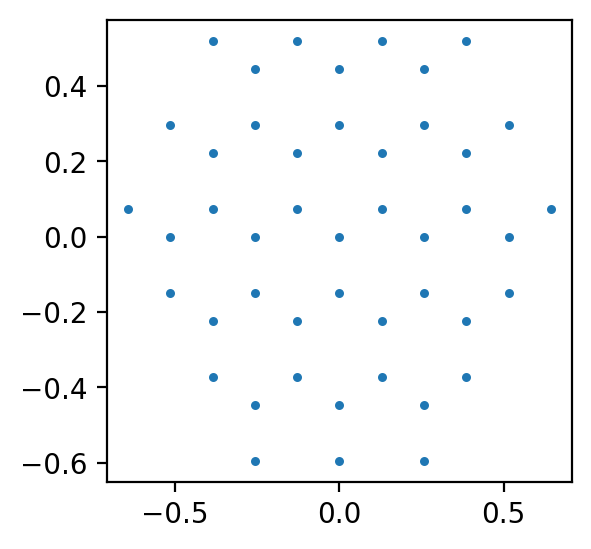

In [36]:
f = plt.figure(figsize=(3, 3), dpi=200)
plt.scatter(np.array(list((k_dict.values())))[:, 0], np.array(list((k_dict.values())))[:, 1], s=5)

In [37]:
# neighbors_dict

In [38]:
len(k_dict)

46

In [39]:
bands = []
T_matrices = [T_b, T_tr, T_tl]

for k in kpoints:

    # Full Hamiltonian
    H_k = np.zeros((2 * len(k_dict), 2 * len(k_dict)), dtype=complex)

    # Build intralayer Dirac Hamiltonians
    for site_id, k_vector in k_dict.items():
        h_k = H_D(layer_dict[site_id] * theta / 2, k + k_vector)
        place_block(H_k, h_k, 2 * site_id, 2 * site_id)

    # Build interlayer hopping Hamiltonians
    for site_id, neighbors in neighbors_dict.items():
        for neighbor in neighbors:
            place_block(H_k, T_matrices[neighbor[1]], 2 * site_id, 2 * neighbor[0])

    # Diagonalize
    vals, vecs = np.linalg.eig(H_k)
    vals = np.real(vals)
    idxs = np.argsort(vals)
    vals = vals[idxs]
    bands.append(vals)

In [40]:
len(bands[0])

92

Text(0.5, 1.0, '$\\theta = 5.0^{\\circ}$')

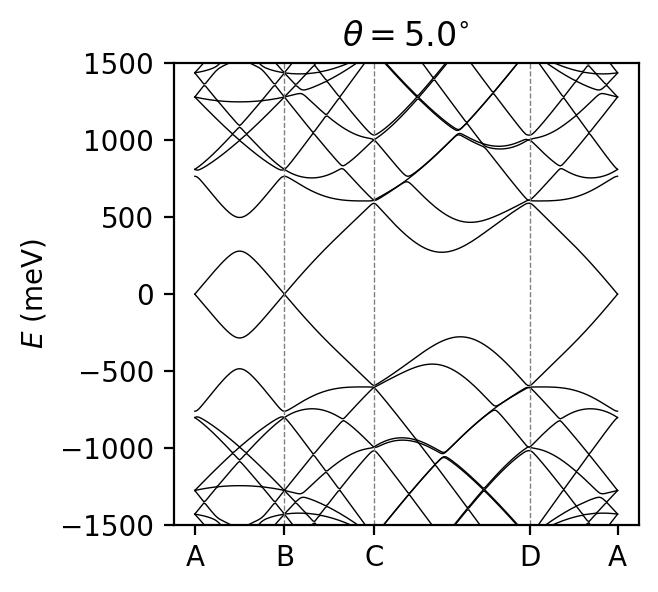

In [41]:
plt.figure(figsize=(3, 3), dpi=200)
bands = np.array(bands)
for i, band in enumerate(bands[0]):
    plt.plot(-bands[:, i], color="k", linewidth=0.5)
plt.axvline(50, color="grey", linestyle="--", linewidth=0.5)
plt.axvline(100, color="grey", linestyle="--", linewidth=0.5)
plt.axvline(187, color="grey", linestyle="--", linewidth=0.5)
x_ticks = [0, 50, 100, 187, 236]
xtick_labels = ["A", "B", "C", "D", "A"]
plt.xticks(x_ticks, xtick_labels)
plt.ylabel(r"$E$ (meV)")
plt.ylim(bottom=-1500, top=1500)
plt.title(fr"$\theta = {theta / np.pi * 180}^{{\circ}}$")
# plt.savefig(f"BM_05-deg-twist_{num_shells}-shells_ABCDA.png", bbox_inches="tight", dpi=200)